In [1]:
# importing all the data modules used in the code
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
from sklearn import metrics
import idx2numpy
import random
from collections import Counter

In [2]:
# reading the data files
train_x = idx2numpy.convert_from_file("train-images.idx3-ubyte")
train_y = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
test_x = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
test_y = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

In [3]:
X = np.array([i.flatten() for i in train_x])
test = np.array([i.flatten() for i in test_x])

In [4]:
# randomly selecting index which is to be used to be taken from the original data frame
index = random.sample(range(0,60000), 60000)

In [5]:
training_x = X[index[12000:60000]]
training_y = train_y[index[12000:60000]]
## taking the remaining 48000 data points for training the model.

In [6]:
training_x.shape

(48000, 784)

In [7]:
validation_X = X[index[0:12000]]
validation_Y = train_y[index[0:12000]]
## taking 12000 data for validating the model

In [8]:
final_indexing = list(random.sample(range(0,12000), 12000))
validation_X1 = validation_X[final_indexing[0:6000]]
validation_Y1 = validation_Y[final_indexing[0:6000]]

In [9]:
test_index = list(random.sample(range(0,10000), 10000))

In [10]:
test_x = test[test_index[0:3000]]
test_y = test_y[test_index[0:3000]]
## taking 3000 data points for testing the model

# counting the number of label in training, testing and validation set

In [11]:
count1 = Counter(training_y)
print("The number of labels in the training set is-")
for c1 in count1:
    print(c1,count1[c1])

The number of labels in the training set is-
0 4781
7 4972
8 4648
6 4682
2 4758
1 5385
3 4876
5 4393
4 4724
9 4781


## a barplot showing the above count

Text(0, 0.5, 'count')

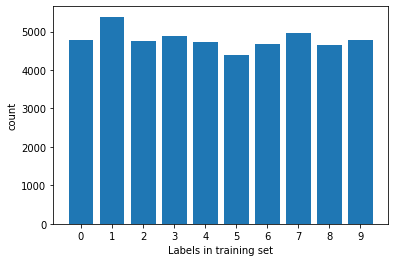

In [12]:
x = np.arange(0,10,1)
plt.xticks(x)
plt.bar(count1.keys(), count1.values())
plt.xlabel("Labels in training set")
plt.ylabel("count")

In [13]:
count2 = Counter(validation_Y1)
print("The number of labels in the valdation set is-")
for c2 in count2:
    print(c2,count2[c2])

The number of labels in the valdation set is-
4 546
8 597
0 589
9 562
6 621
7 650
3 640
1 686
2 591
5 518


## a barplot showing the above count

Text(0, 0.5, 'count')

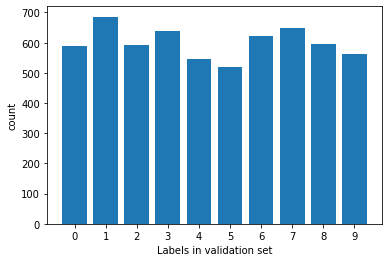

In [14]:
plt.xticks(x)
plt.bar(count2.keys(), count2.values())
plt.xlabel("Labels in validation set")
plt.ylabel("count")

In [15]:
count3 = Counter(test_y)
print("The number of labels in the test set is-")
for c3 in count3:
    print(c3,count3[c3])

The number of labels in the test set is-
7 307
3 315
9 308
6 273
5 288
0 292
8 278
2 331
1 336
4 272


## the barplot showing the above thing

Text(0, 0.5, 'count')

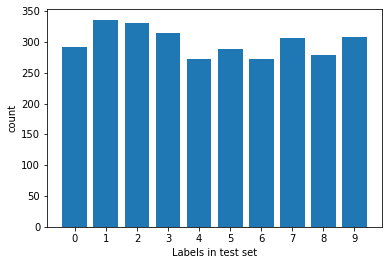

In [16]:
plt.xticks(x)
plt.bar(count3.keys(), count3.values())
plt.xlabel("Labels in test set")
plt.ylabel("count")

# defining the functions

In [17]:
def knn(k,x):
    df = pd.DataFrame(x)
    df1 = df.copy()
    df1['label'] = training_y
    y_bar = []
    for i in range(len(df.columns)):
        df2 = pd.concat([df[i], df1['label']], axis = 1)
        df3 = df2.sort_values(i, axis = 0)
        final = df3.iloc[:k,:]
        x2 = final.value_counts(df1.label)
        c = np.argmax(x2)
        y_bar.append(x2.index[c])
    return y_bar


def Acc(x,y):
    loss = []
    for i in range(len(y)):
        if x[i] == y[i]:
            loss.append(0)
        else:
            loss.append(1)
        k = np.array(loss).sum()
        ll = len(loss)
        acc = 1- (k/ll)
    return acc

# Euclidean distance

## Validation

In [18]:
start = time.process_time()
eucledian_distance = metrics.pairwise_distances(X = training_x, Y = validation_X1, metric = "euclidean")
print(time.process_time() - start)

47.186033624000004


In [20]:
pd.DataFrame(eucledian_distance)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,3351.194712,3080.876986,3107.929536,3432.714087,1808.585635,3136.188610,2519.203644,3237.900091,2996.689674,3095.098060,...,2663.733470,3197.149824,3176.212210,3164.208590,2730.791643,2288.203007,2347.502929,2780.472082,3193.715235,3258.298482
1,2276.752951,2781.131245,1964.463285,2533.268640,2864.858810,2097.453933,2936.935648,2192.219195,2217.495660,2432.138565,...,3430.034111,1028.171678,2882.301511,2405.657498,2683.500140,2818.328405,3283.169810,2266.988972,2460.918325,3142.662088
2,2582.574684,2157.510834,2408.300230,2738.315541,3041.093882,2066.316288,3151.795520,2219.101395,2742.024252,1997.613576,...,3270.847597,2179.574500,2567.015388,2557.698575,2681.462474,2893.765194,3178.117367,2420.348942,2494.856509,2689.175896
3,2659.710511,2224.179624,2402.914897,2804.514931,2832.224214,2186.539961,2967.081563,2421.911022,2680.901527,1990.341679,...,3079.931817,2320.266149,2582.199063,2537.013599,2717.495354,2717.599124,2997.803529,2339.296262,2475.263016,2399.283435
4,2824.815038,2654.688494,2770.742500,2670.804373,2793.978167,2654.615038,2840.613842,2884.656132,3056.835782,2536.889434,...,3139.059732,2836.097495,2956.121445,2902.954702,2833.493780,3009.773912,3354.683592,2850.540826,2795.756248,2314.483312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2629.837638,2366.593121,2362.756441,2399.624971,2938.465246,2256.512132,2945.402689,2016.989093,2815.712876,2024.464868,...,3413.192347,2081.124456,2709.470797,2481.609961,2586.961345,2950.729571,3227.439233,2106.339241,2145.978332,2756.260692
47996,2535.147727,2427.283873,2273.081169,2590.102315,2932.190990,2103.473080,2972.606432,2089.678683,2284.785548,2326.610410,...,3256.093672,1951.091233,2832.383096,2245.816110,2869.590389,2780.929161,3207.463484,2272.054797,2581.481164,3275.770596
47997,2619.403558,2224.964269,2351.522698,2646.397362,3223.801328,2123.393039,3397.456990,1896.518916,2780.537718,2003.320993,...,3164.999368,2505.972067,2594.431152,2174.577430,2884.676412,2943.027013,3153.467457,2352.237233,2400.939399,3022.102248
47998,2406.607986,2527.860558,2122.286032,2796.873612,2799.212032,1924.555273,3076.963601,2386.702118,1808.497443,2378.508356,...,3116.124195,2384.281653,2769.650881,1854.093309,3014.890877,2441.173693,2893.876293,2654.507299,2334.202862,3138.757238


In [19]:
start = time.process_time()
eucledian_pred = [knn(i,eucledian_distance) for i in range(1,26,2)]
print(time.process_time() - start)

409.706367999


In [20]:
eucl_list_acc = [Acc(validation_Y1,i) for i in eucledian_pred]
index = np.argmax(np.array(eucl_list_acc))
k_req = np.arange(1,26,2)
k_euc = k_req[index]
accuracy_E = eucl_list_acc[index]*100; 
print("The accuracy for Euclidean Validation is", accuracy_E)

The accuracy for Euclidean Validation is 97.48333333333333


the required value of k is  3


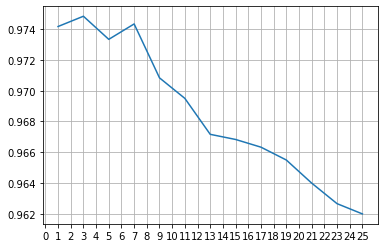

In [21]:
plt.plot(k_req,eucl_list_acc)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()
print("the required value of k is ", k_euc)

In [22]:
pd.crosstab(np.array(validation_Y1),np.array(eucledian_pred[index]))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,629,0,1,0,0,1,0,0,0,1
1,0,669,3,0,0,0,0,0,0,0
2,1,2,562,1,0,0,2,8,0,1
3,0,0,5,615,0,4,0,3,0,1
4,2,4,0,0,563,0,0,2,1,10
5,2,1,0,6,0,514,1,0,1,5
6,1,3,0,0,0,3,569,0,0,0
7,0,8,0,0,0,0,0,588,0,2
8,4,7,2,8,1,8,3,0,580,5


## testing -

In [23]:
test_euc_distance = metrics.pairwise_distances(X = training_x , Y = test_x, metric = "euclidean")
test_euc_predicted = knn(k_euc,test_euc_distance)
test_eucl_list_acc = Acc(test_euc_predicted,test_y);test_eucl_list_acc
accuracy_E = test_eucl_list_acc*100; 
print("The accuracy for Euclidean distance on Validation set is", accuracy_E)

The accuracy for Euclidean distance on Validation set is 97.03333333333333


In [24]:
pd.crosstab(np.array(test_y),np.array(test_euc_predicted))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,296,0,0,0,0,0,0,1,0,0
1,0,363,0,0,0,0,1,0,0,0
2,5,4,304,0,0,0,1,4,0,0
3,0,0,1,308,0,6,0,2,1,1
4,0,1,0,0,279,0,3,0,0,7
5,1,1,0,5,0,265,0,0,0,3
6,0,0,0,0,1,2,278,0,0,0
7,0,8,1,0,0,0,0,280,0,2
8,0,2,2,5,1,3,1,2,273,2


# Manhattan distance

## Validation

In [25]:
manhattan_distance = metrics.pairwise_distances(X = training_x, Y = validation_X1, metric = "manhattan")
manhattan_pred = [knn(i,manhattan_distance) for i in range(1,26,2)]
man_list_acc = [Acc(validation_Y1,i) for i in manhattan_pred]
index = np.argmax(np.array(man_list_acc))
k_req = np.arange(1,26,2)
k_man = k_req[index]
accuracy_M = man_list_acc[index]*100; 
print("The accuracy for Manhattan distance on Validation set is", accuracy_M)

The accuracy for Manhattan distance on Validation set is 96.81666666666666


the required value of k is  7


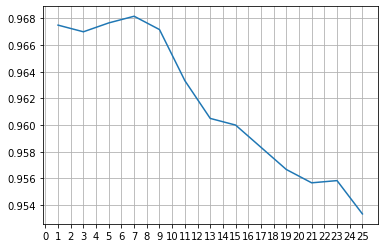

In [26]:
plt.plot(k_req,man_list_acc)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()
print("the required value of k is ", k_man)

In [27]:
pd.crosstab(np.array(validation_Y1),np.array(manhattan_pred[index]))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,630,0,0,0,0,1,0,0,0,1
1,0,669,1,0,0,0,0,2,0,0
2,3,8,549,1,0,0,3,11,1,1
3,0,2,6,610,0,4,0,5,0,1
4,1,8,0,0,556,0,0,3,0,14
5,1,4,0,5,0,514,1,0,1,4
6,1,2,0,0,0,2,571,0,0,0
7,0,10,0,0,0,0,0,586,0,2
8,4,11,1,11,3,10,4,0,566,8


## testing

In [28]:
test_man_distance = metrics.pairwise_distances(X = training_x , Y = test_x, metric = "manhattan")
test_man_predicted= knn(k_man,test_man_distance)
test_man_list_acc = Acc(test_man_predicted,test_y);test_man_list_acc
accuracy_M = test_man_list_acc*100; 
print("The accuracy for Manhattan distance on Validation set is", accuracy_M)

The accuracy for Manhattan distance on Validation set is 96.13333333333334


In [29]:
pd.crosstab(np.array(test_y),np.array(test_man_predicted))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,296,0,0,0,0,0,0,1,0,0
1,0,364,0,0,0,0,0,0,0,0
2,6,11,293,0,0,0,2,6,0,0
3,0,1,0,311,0,3,0,2,1,1
4,0,3,0,0,279,0,3,0,0,5
5,2,1,0,7,0,261,1,0,0,3
6,1,1,0,0,1,1,277,0,0,0
7,0,9,1,0,0,0,0,278,0,3
8,2,2,2,5,1,6,2,2,266,3


# Chebyshev distance

## Validation

In [30]:
cheby_distance = metrics.pairwise_distances(X = training_x, Y = validation_X1, metric = "chebyshev")
cheby_pred = [knn(i,cheby_distance) for i in range(1,26,2)]
che_list_acc = [Acc(validation_Y1,i) for i in cheby_pred]
index = np.argmax(np.array(che_list_acc))
k_req = np.arange(1,26,2)
k_che = k_req[index]
accuracy_C = che_list_acc[index]*100; 
print("The accuracy for chebyshev distance on Validation set is", accuracy_C)

The accuracy for chebyshev distance on Validation set is 82.68333333333334


the required value of k is  1


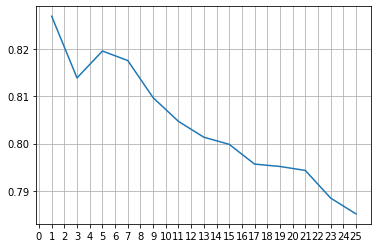

In [31]:
plt.plot(k_req,che_list_acc)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()
print("the required value of k is ", k_che)

In [32]:
pd.crosstab(np.array(validation_Y1),np.array(cheby_pred[index]))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,593,1,5,9,7,10,3,0,1,3
1,0,651,6,4,0,2,2,0,7,0
2,31,7,400,32,13,17,14,9,45,9
3,9,8,25,440,4,43,10,12,73,4
4,7,2,11,8,457,13,11,5,35,33
5,22,5,6,26,13,370,13,5,54,16
6,14,2,6,3,4,5,527,0,13,2
7,3,5,8,4,4,10,1,531,12,20
8,12,14,13,38,11,26,6,3,483,12


## testing

In [33]:
test_che_distance = metrics.pairwise_distances(X = training_x , Y = test_x, metric = "chebyshev")
test_che_predicted = knn(k_che,test_che_distance)
test_che_list_acc = Acc(test_che_predicted,test_y);test_che_list_acc
accuracy_C = test_che_list_acc*100; 
print("The accuracy for Chebyshev distance on Validation set is", accuracy_C)

The accuracy for Chebyshev distance on Validation set is 80.69999999999999


In [34]:
pd.crosstab(np.array(test_y),np.array(test_che_predicted))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,273,2,4,3,2,5,2,3,1,2
1,0,358,1,0,0,1,1,0,2,1
2,10,3,219,22,8,14,19,2,17,4
3,6,7,11,221,3,17,7,4,42,1
4,11,2,2,2,220,10,4,6,13,20
5,15,4,8,16,7,181,7,3,25,9
6,12,0,1,1,2,9,248,1,7,0
7,2,3,8,2,4,4,0,247,12,9
8,7,6,7,17,7,16,7,3,216,5
